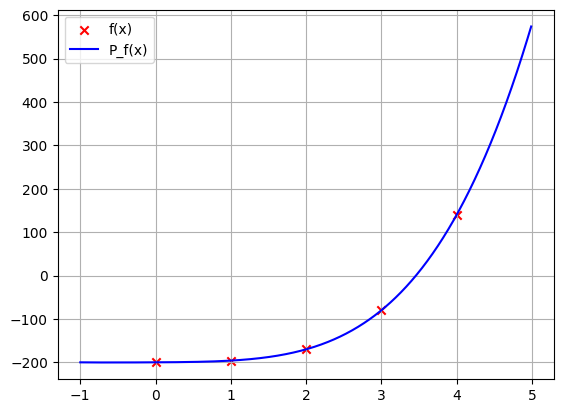

coeffs = [-200, 4.0, 11.0, 7.0, 1.0]


[-200, 4.0, 11.0, 7.0, 1.0]

In [219]:
import matplotlib.pyplot as plt
import numpy as np

class Interpolation:
  """compute the function f defined by just points """

  def __init__(self,points:list[int],f:list[int]):
    self.points = points
    self.f = f
    self.coeffs = []
    self.compute_coeff(self.points,self.f,1)

  def get_coeffs(self):
    return self.coeffs

  def change_points(self,new_points:list[int],new_f:list[int]):
    self.points = new_points
    self.f = new_f
    self.coeffs = []
    self.compute_coeff(self.points,self.f,1)

  def add_points(self,new_points:list[int],new_f:list[int]):
    self.points.extend(new_points)
    self.f.extend(new_f)
    self.coeffs = []
    self.compute_coeff(self.points,self.f,1)

  def compute_coeff(self,X,f,iteration):
    new_f = []
    self.coeffs.append(f[0])
    for i in range(len(X)-iteration):
      value = (f[i] - f[i+1]) / (X[i] - X[i+iteration])
      new_f.append(value)
    if (len(new_f) > 1):
      self.compute_coeff(X,new_f,iteration+1)
    else:
      self.coeffs.append(new_f[0])

  def polynomial_f(self,x):
    product = 1
    value = self.coeffs[0]
    for i in range(len(self.coeffs)-1):
      product = product * (x - self.points[i])
      value += product * self.coeffs[i+1]
    return value

  def plot_point_polynomial(self):
    interval = np.arange(self.points[0]-1,self.points[-1]+1,0.01)
    plt.scatter(self.points,self.f,marker="x",color="red",label="f(x)")
    plt.plot(interval,[self.polynomial_f(i) for i in interval],color="blue",label="P_f(x)")
    plt.legend()
    plt.grid()
    plt.show()

test = Interpolation([i for i in range(5)],[-200,-196,-170,-80,140])
test.plot_point_polynomial()
print("coeffs =",test.get_coeffs())


coeffs = [1]


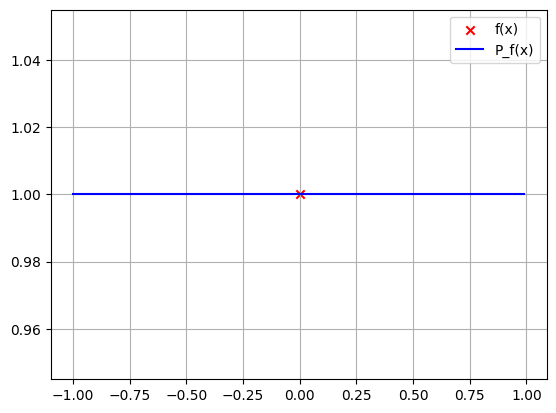


coeffs = [1, 0.16666666666666666, 0.2777777777777778, -0.17777777777777778]


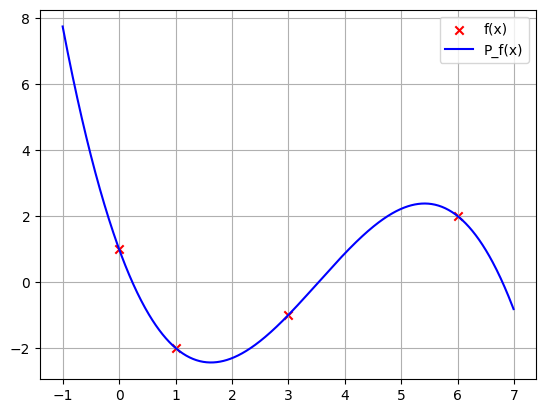


coeffs = [1, 0.16666666666666666, 0.2777777777777778, -0.17777777777777778, 0.03611111111111112]


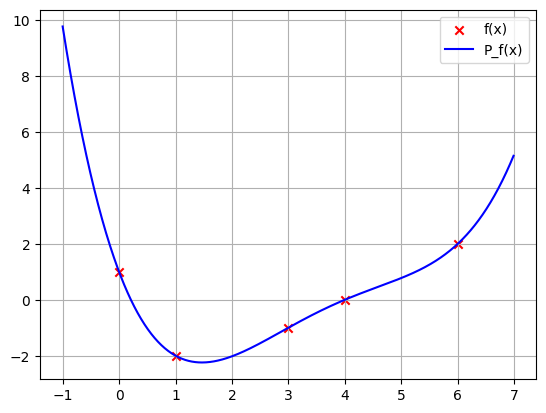

In [220]:
import matplotlib.pyplot as plt
import numpy as np

class InterpolationV2:
  """same as interpolation calss but it stores all the coeffs when calculating the polynomial,
    so when adding new points it wont have to compute all the coeffs again
  """

  def __init__(self,points:list[int],f:list[int]):
    self.points = [points[0]]
    self.all_coeffs = [[f[0]]]
    self.add_points(points[1:],f[1:])

  def get_coeffs(self):
    return [self.all_coeffs[i][0] for i in range(len(self.all_coeffs))]

  def add_points(self,new_points:list[int],new_f:list[int]):
    for pt in range(len(new_points)):
      self.add_point(new_points[pt],new_f[pt])

  def change_points(self,new_points:list[int],new_f:list[int]):
    self.points = [new_points[0]]
    self.all_coeffs = [[new_f[0]]]
    self.add_points(new_points[1:],new_f[1:])

  def add_point(self,new_points:int,new_f:int):

      self.points.append(new_points)
      self.all_coeffs[0].append(new_f)
      self.all_coeffs.append([])

      i=0
      while i <= (len(self.points)-2):
        value = (self.all_coeffs[i][-2] - self.all_coeffs[i][-1]) / (self.points[-2-i] - self.points[-1])
        self.all_coeffs[i+1].append(value)
        i+=1

  def polynomial_f(self,x):
    product = 1
    value = self.all_coeffs[0][0]
    for i in range(len(self.all_coeffs[0])-1):
      product = product * (x - self.points[i])
      value += product * self.all_coeffs[i+1][0]
    return value

  def plot_point_polynomial(self):
    interval = np.arange(min(self.points)-1,max(self.points)+1,0.01)
    plt.scatter(self.points,self.all_coeffs[0],marker="x",color="red",label="f(x)")
    plt.plot(interval,[self.polynomial_f(i) for i in interval],color="blue",label="P_f(x)")
    plt.legend()
    plt.grid()
    plt.show()

test1 = InterpolationV2([0],[1])
print("coeffs =",test1.get_coeffs())
test1.plot_point_polynomial()

test1.add_points([6,3,1],[2,-1,-2])
print("\ncoeffs =",test1.get_coeffs())
test1.plot_point_polynomial()

test1.add_point(4,0)
print("\ncoeffs =",test1.get_coeffs())
test1.plot_point_polynomial()



coeffs = [72.8, 0.28000000000000114, -0.008000000000000113, 0.0008000000000000113, -0.00010666666666666818]


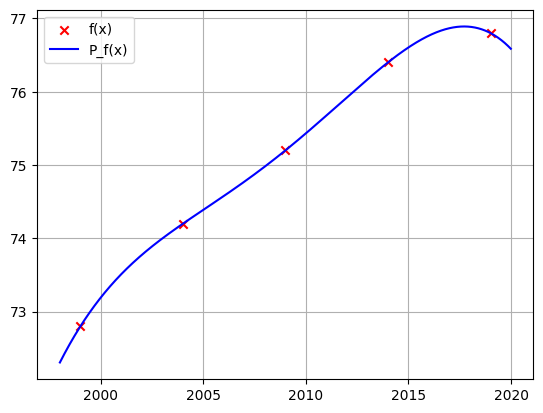

In [218]:
x = [1999+5*i for i in range(5)]
f = [72.8,74.2, 75.2, 76.4, 76.8]

test1.change_points(x,f)
print("coeffs =",test1.get_coeffs())
test1.plot_point_polynomial()

coeffs = [0, 1.0, -0.125, 0.0625]


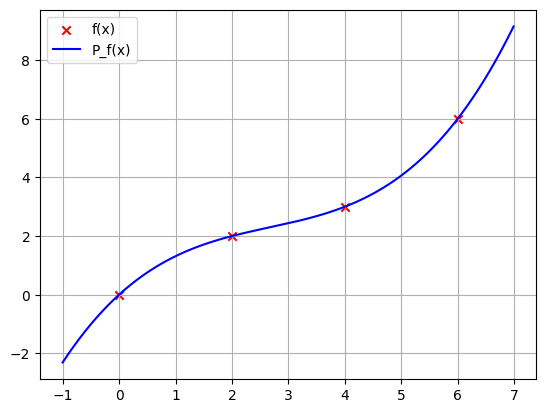


coeffs = [0, 1.0, -0.125, 0.0625, -0.028645833333333332, 0.006770833333333333, -0.000933159722222222]


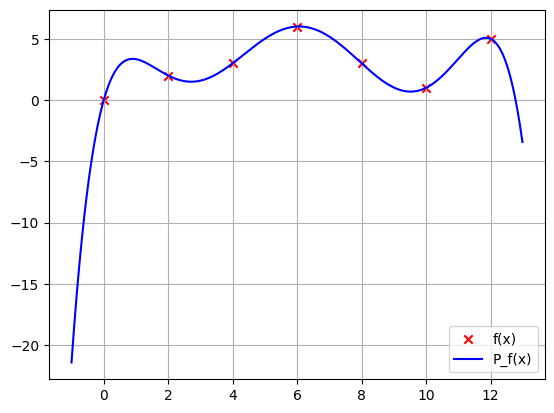

In [217]:
x = [i for i in range(0,14,2)]
f = [0,2,3,6,3,1,5]

test1 = Interpolation(x[0:4],f[0:4])
print("coeffs =",test1.get_coeffs())
test1.plot_point_polynomial()

test1.add_points(x[4:],f[4:])
print("\ncoeffs =",test1.get_coeffs())
test1.plot_point_polynomial()
